## Description

This implementation that uses a class to refactor the model architecture and preprocessing methods. This is located in CNN_3_2.py

This version is trained on LaFleur_stacking_data.csv which LaFleur et al.'s base data and the predicted expression from Van Brempt et al. based on the spacer.

This version goes back to CNN_3_2's approach of including Van Brempt et al.'s predictions as input features. However, this uses the data differently by not limiting the spacer size to 17.

For X data, it onehot encodes base pairs in each element and appeneds them to a 2 dimensional array. It pads each element so that each element is the same length. The y data is the 'Observed' which is normalized using sklearn's MinMaxScaler (from 0, high expression to 1, low expression).

In [1]:
import CNN_3_2 as parent

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
name = 'CNN_3_3'

In [3]:
file_path = '../Data/LaFleur_stacking_data.csv'

df = parent.load_and_preprocess_data(file_path)

In [4]:
X, y, ProD_pred = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X, ProD_pred)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0224 - val_loss: 0.0084
Epoch 2/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 3/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 4/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0081
Epoch 5/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 6/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 7/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0093
Epoch 8/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 9/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057 - val_loss: 0.0071
Epoch 10/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 11/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0068
Epoch 12/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


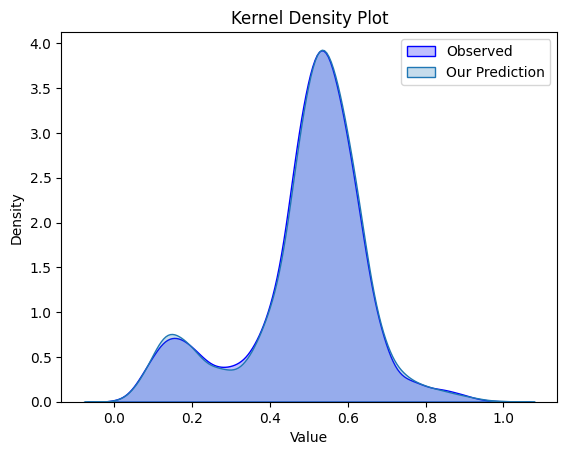

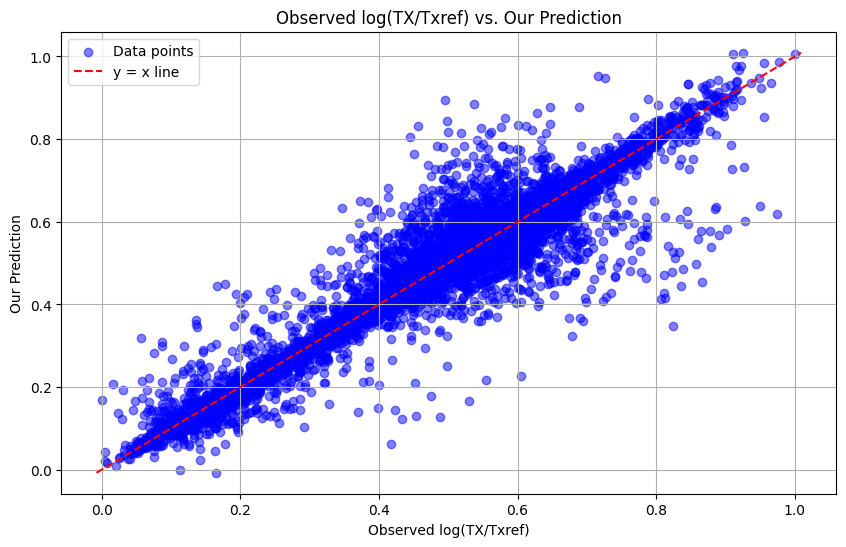

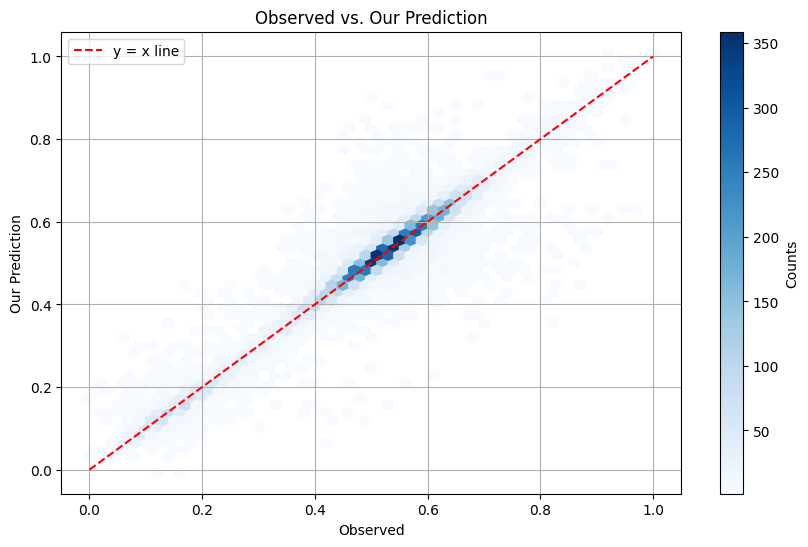

In [7]:
predicted = parent.load_and_predict(name, X)
observed = df['Normalized Observed'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [8]:
loss

0.010403825901448727